## Contents
- [Imports](#Data-Dictionary)
- [Regression Modeling Age + Pop Density](#Regression-Modeling-Age-+-Pop-Density)  
- [Reg Model: 0-35, 35-59, 60-84, 85+](#Reg-Model:-0-35,-35-59,-60-84,-85+)
- [Reg Model: 0-44, 45-75, 75+](#-Reg-Model:-0-44,-45-75,-75+)
- [Reg Model: 0-64, 65+](#Reg-Model:-0-64,-65+)
- [Reg Model: Median Age](#Reg-Model:-Median-Age)
- [Correlations age](#Correlations-age)
- [Correlations the whole df](#Correlations-the-whole-df)
- [Regression Modeling Sex](#Regression-Modeling-Sex)

# Target Age Brackets 0-44, 45-75, 75+

# Imports

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Texas data and sae to a dataframe.
tx_df = pd.read_csv('../data/texas_combined_cleaned_with_tests_obesity_no_outliers.csv')

In [3]:
# Display the first few rows of the dataframe.
tx_df.head(3)

,county_name,total_tests,obes_percent,total_cases,total_fatalities,death_rate,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,...,percent_inc_hhlds_35_000_to_49_999,percent_inc_hhlds_50_000_to_74_999,percent_inc_hhlds_75_000_to_99_999,percent_inc_hhlds_100_000_to_149_999,percent_inc_hhlds_150_000_to_199_999,percent_inc_hhlds_200_000_or_more,deaths_per_100_cases,fatalities/population,tests/population,cases/population
0,anderson,29485,0.373,2922.0,39,0.013347,57863,10142,34312,12127,...,0.162282,0.197217,0.112097,0.087004,0.025639,0.014582,1.334702,0.000674,0.509566,0.050499
1,andrews,1943,0.313,567.0,10,0.017637,17818,9979,7215,321,...,0.124546,0.152687,0.132171,0.220407,0.072259,0.063907,1.763668,0.000561,0.109047,0.031822
2,angelina,20269,0.396,2277.0,90,0.039526,87607,19174,53216,12834,...,0.132248,0.188318,0.130364,0.105805,0.031998,0.020758,3.952569,0.001027,0.231363,0.025991


In [4]:
# Display information about the dataframe.
tx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 95 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   county_name                                                        248 non-null    object 
 1   total_tests                                                        248 non-null    int64  
 2   obes_percent                                                       248 non-null    float64
 3   total_cases                                                        248 non-null    float64
 4   total_fatalities                                                   248 non-null    int64  
 5   death_rate                                                         248 non-null    float64
 6   race_pop                                                           248 non-null    int64  
 7   race_pop_hispanic_or_latin

In [5]:
# Set the county name to the index.
tx_df = tx_df.set_index('county_name')

# Regression Modeling Age + Pop Density

In [6]:
# Create a subset of age demographic columns for modeling.
# Extract columns for age-based model.
age_mod_cols = [
    'total_cases', 'total_fatalities', 'death_rate', 'deaths_per_100_cases', 'sex_age_pop', 'sex_age_pop_male', 'sex_age_pop_female',
    'sex_age_pop_under_5', 'sex_age_pop_5_to_9', 'sex_age_pop_10_to_14', 'sex_age_pop_15_to_19',
    'sex_age_pop_20_to_24', 'sex_age_pop_25_to_34', 'sex_age_pop_35_to_44', 'sex_age_pop_45_to_54',
    'sex_age_pop_55_to_59', 'sex_age_pop_60_to_64', 'sex_age_pop_65_to_74', 'sex_age_pop_75_to_84',
    'sex_age_pop_85_and_over', 'pop_density', 'sex_age_median_age_in_years'
]

In [7]:
# Create a dataframe for age groups
tx_age = tx_df[age_mod_cols]

## Reg Model: 0-35, 35-59, 60-84, 85+

In [8]:
tx_age['sex_age_pop_0_to_35'] = tx_age['sex_age_pop_under_5'] + tx_age['sex_age_pop_5_to_9']\
                + tx_age['sex_age_pop_10_to_14'] + tx_age['sex_age_pop_15_to_19']\
                + tx_age['sex_age_pop_20_to_24'] + tx_age['sex_age_pop_25_to_34']

In [9]:
tx_age['sex_age_pop_35_to_59'] = tx_age['sex_age_pop_35_to_44'] + tx_age['sex_age_pop_45_to_54'] + tx_age['sex_age_pop_55_to_59']

In [10]:
tx_age['sex_age_pop_60_to_84'] = tx_age['sex_age_pop_60_to_64'] + tx_age['sex_age_pop_65_to_74'] + tx_age['sex_age_pop_75_to_84']

In [11]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('sex_age_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['sex_age_pop']
    return

In [12]:
# Apply the function to the numbers dataframe
to_percentage(tx_age)

In [13]:
list(tx_age.columns)

['total_cases',
 'total_fatalities',
 'death_rate',
 'deaths_per_100_cases',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'pop_density',
 'sex_age_median_age_in_years',
 'sex_age_pop_0_to_35',
 'sex_age_pop_35_to_59',
 'sex_age_pop_60_to_84',
 'percent_sex_age_pop_male',
 'percent_sex_age_pop_female',
 'percent_sex_age_pop_under_5',
 'percent_sex_age_pop_5_to_9',
 'percent_sex_age_pop_10_to_14',
 'percent_sex_age_pop_15_to_19',
 'percent_sex_age_pop_20_to_24',
 'percent_sex_age_pop_25_to_34',
 'percent_sex_age_pop_35_to_44',
 'percent_sex_age_pop_45_to_54',
 'percent_sex_age_pop_55_to_59',
 'percent_sex_age_pop_60_to_64',
 'percent_sex_age_pop_65_to_7

In [14]:
X = tx_age[[
    'percent_sex_age_pop_0_to_35',
    'percent_sex_age_pop_35_to_59',
    'percent_sex_age_pop_60_to_84',
    'percent_sex_age_pop_85_and_over',
]]

y = tx_age['deaths_per_100_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [16]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [17]:
X_train.shape, y_test.shape

((186, 4), (62,))

In [18]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.45940718329822533

## Reg Model: 0-44, 45-75, 75+

In [19]:
tx_age['sex_age_pop_0_to_44'] = tx_age['sex_age_pop_under_5'] + tx_age['sex_age_pop_5_to_9'] \
                + tx_age['sex_age_pop_10_to_14'] + tx_age['sex_age_pop_15_to_19'] + tx_age['sex_age_pop_20_to_24']\
                + tx_age['sex_age_pop_25_to_34'] + tx_age['sex_age_pop_35_to_44']

In [20]:
tx_age['sex_age_pop_45_to_74'] = tx_age['sex_age_pop_45_to_54'] + tx_age['sex_age_pop_55_to_59'] \
                + tx_age['sex_age_pop_60_to_64'] + tx_age['sex_age_pop_65_to_74']

In [21]:
tx_age['sex_age_pop_75_and_over'] = tx_age['sex_age_pop_75_to_84'] + tx_age['sex_age_pop_85_and_over']

In [22]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    
    for column in dataframe.columns:
        if column.startswith('sex_age_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['sex_age_pop']
    
    return

In [23]:
# Apply the function to the numbers dataframe
to_percentage(tx_age)

In [24]:
list(tx_age.columns)

['total_cases',
 'total_fatalities',
 'death_rate',
 'deaths_per_100_cases',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'pop_density',
 'sex_age_median_age_in_years',
 'sex_age_pop_0_to_35',
 'sex_age_pop_35_to_59',
 'sex_age_pop_60_to_84',
 'percent_sex_age_pop_male',
 'percent_sex_age_pop_female',
 'percent_sex_age_pop_under_5',
 'percent_sex_age_pop_5_to_9',
 'percent_sex_age_pop_10_to_14',
 'percent_sex_age_pop_15_to_19',
 'percent_sex_age_pop_20_to_24',
 'percent_sex_age_pop_25_to_34',
 'percent_sex_age_pop_35_to_44',
 'percent_sex_age_pop_45_to_54',
 'percent_sex_age_pop_55_to_59',
 'percent_sex_age_pop_60_to_64',
 'percent_sex_age_pop_65_to_7

In [25]:
X = tx_age[[
    'percent_sex_age_pop_0_to_44',
    'percent_sex_age_pop_45_to_74',
    'percent_sex_age_pop_75_and_over',
]]

y = tx_age['deaths_per_100_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [27]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [28]:
X_train.shape, y_test.shape

((186, 3), (62,))

In [29]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.21574767134405698

## Reg Model: 0-64, 65+

In [30]:
tx_age['sex_age_pop_0_to_64'] = tx_age['sex_age_pop_under_5'] + tx_age['sex_age_pop_5_to_9'] + tx_age['sex_age_pop_10_to_14']\
                                + tx_age['sex_age_pop_15_to_19'] + tx_age['sex_age_pop_20_to_24'] + tx_age['sex_age_pop_25_to_34'] \
                                + tx_age['sex_age_pop_35_to_44'] + tx_age['sex_age_pop_45_to_54'] + tx_age['sex_age_pop_55_to_59'] \
                                + tx_age['sex_age_pop_60_to_64']

In [31]:
tx_age['sex_age_pop_65_and_over'] = tx_age['sex_age_pop_65_to_74'] + tx_age['sex_age_pop_75_to_84'] + tx_age['sex_age_pop_85_and_over']

In [32]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('sex_age_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['sex_age_pop']
    return

In [33]:
# Apply the function to the numbers dataframe
to_percentage(tx_age)

In [34]:
list(tx_age.columns)

['total_cases',
 'total_fatalities',
 'death_rate',
 'deaths_per_100_cases',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'pop_density',
 'sex_age_median_age_in_years',
 'sex_age_pop_0_to_35',
 'sex_age_pop_35_to_59',
 'sex_age_pop_60_to_84',
 'percent_sex_age_pop_male',
 'percent_sex_age_pop_female',
 'percent_sex_age_pop_under_5',
 'percent_sex_age_pop_5_to_9',
 'percent_sex_age_pop_10_to_14',
 'percent_sex_age_pop_15_to_19',
 'percent_sex_age_pop_20_to_24',
 'percent_sex_age_pop_25_to_34',
 'percent_sex_age_pop_35_to_44',
 'percent_sex_age_pop_45_to_54',
 'percent_sex_age_pop_55_to_59',
 'percent_sex_age_pop_60_to_64',
 'percent_sex_age_pop_65_to_7

In [35]:
X = tx_age[[
    'percent_sex_age_pop_0_to_64',
    'percent_sex_age_pop_65_and_over'
]]

y = tx_age['deaths_per_100_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [37]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [38]:
X_train.shape, y_test.shape

((186, 2), (62,))

In [39]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.30056078682159215

## Reg Model: Median Age

In [40]:
X = tx_age[[
    'sex_age_median_age_in_years',
]]

y = tx_age['deaths_per_100_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [42]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [43]:
X_train.shape, y_test.shape

((186, 1), (62,))

In [44]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.16128864435360749

# Correlations age

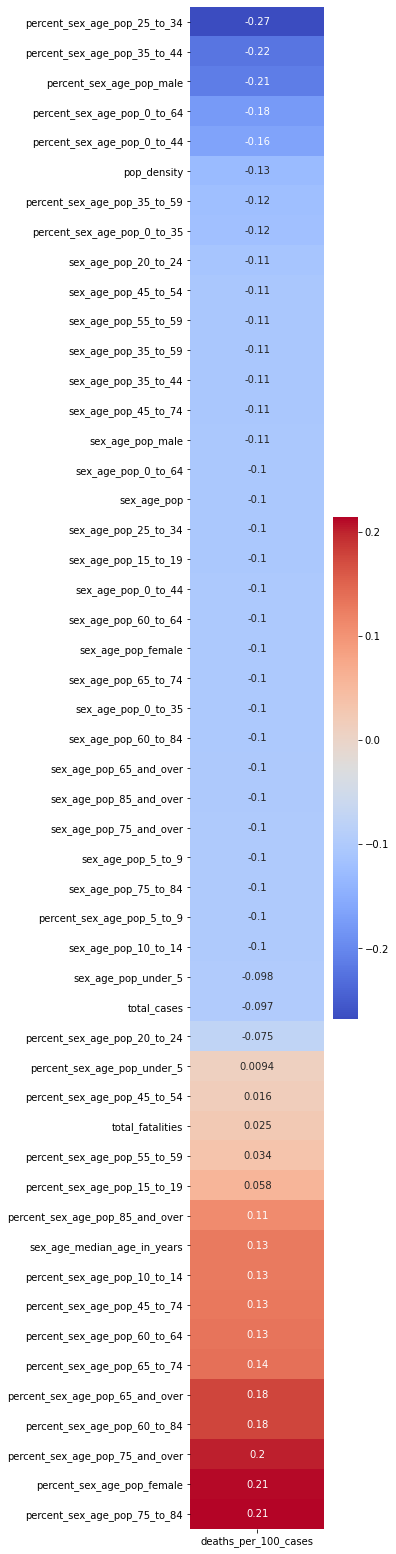

In [45]:
# Visualize the correlation between the variables.
# Save a correlation table to a variable.
corr = tx_age.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 28))
sns.heatmap(corr[['deaths_per_100_cases']].sort_values(by='deaths_per_100_cases').iloc[:-2], annot=True, cmap = 'coolwarm');

# Correlations the whole df

In [46]:
list(tx_df.columns)

['total_tests',
 'obes_percent',
 'total_cases',
 'total_fatalities',
 'death_rate',
 'race_pop',
 'race_pop_hispanic_or_latino_of_any_race',
 'race_pop_white_alone',
 'race_pop_black_or_african_american_alone',
 'race_pop_american_indian_and_alaska_native_alone',
 'race_pop_asian_alone',
 'race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'race_pop_some_other_race_alone',
 'race_pop_two_or_more_races',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'sex_age_median_age_in_years',
 'sq_mi',
 'health_ins_noninst_pop',
 'health_ins_noninst_pop_cov_yes',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'health_ins_noninst_pop

In [47]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    
    for column in dataframe.columns:
        if column.startswith('race_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['race_pop']
        
        elif column.startswith('sex_age_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['sex_age_pop']
            
        elif column.startswith('health_ins_noninst_pop_cov'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['health_ins_noninst_pop']
            
        elif column.startswith('inc_hhlds_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['inc_hhlds']
    
    return

In [48]:
to_percentage(tx_df)

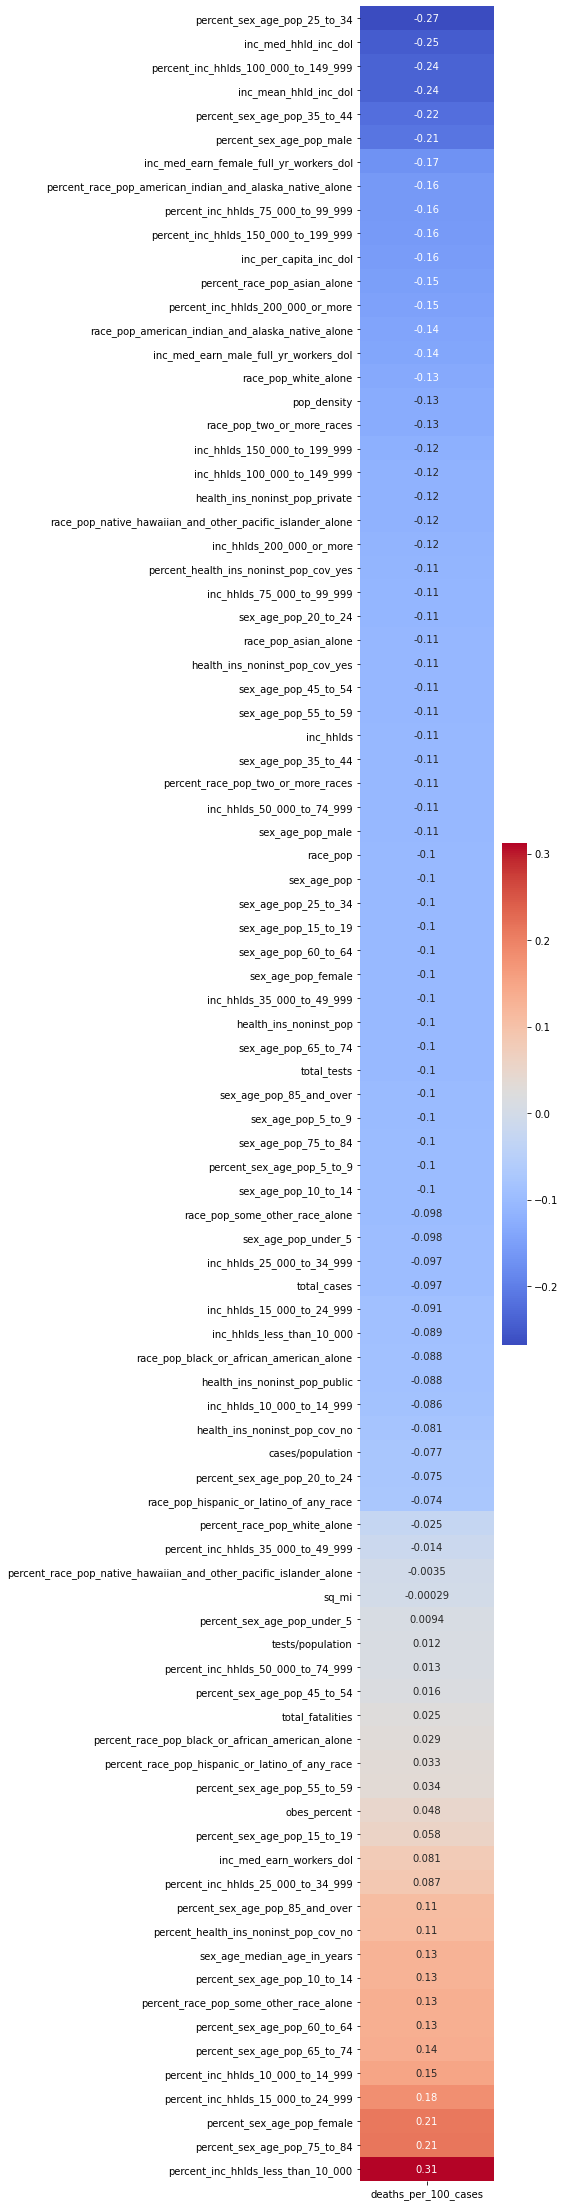

In [49]:
# Visualize the correlation between the variables.
# Save a correlation table to a variable.
corr = tx_df.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 40))
sns.heatmap(corr[['deaths_per_100_cases']].sort_values(by='deaths_per_100_cases').iloc[:-3], annot=True, cmap = 'coolwarm');

# Regression Modeling Sex

In [50]:
list(tx_df.columns)

['total_tests',
 'obes_percent',
 'total_cases',
 'total_fatalities',
 'death_rate',
 'race_pop',
 'race_pop_hispanic_or_latino_of_any_race',
 'race_pop_white_alone',
 'race_pop_black_or_african_american_alone',
 'race_pop_american_indian_and_alaska_native_alone',
 'race_pop_asian_alone',
 'race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'race_pop_some_other_race_alone',
 'race_pop_two_or_more_races',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'sex_age_median_age_in_years',
 'sq_mi',
 'health_ins_noninst_pop',
 'health_ins_noninst_pop_cov_yes',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'health_ins_noninst_pop

In [51]:
# Create a subset of sex demographic columns for modeling.
# Extract columns for sex-based model.
sex_mod_cols = ['sex_age_pop', 'sex_age_pop_male', 'sex_age_pop_female', 'pop_density', 'death_rate', 'deaths_per_100_cases']

In [52]:
# Create a dataframe for age groups
tx_sex = tx_df[sex_mod_cols]

In [53]:
tx_sex

,sex_age_pop,sex_age_pop_male,sex_age_pop_female,pop_density,death_rate,deaths_per_100_cases
county_name,,,,,,
anderson,57863,35412,22451,54.452632,0.013347,1.334702
andrews,17818,9102,8716,11.872960,0.017637,1.763668
angelina,87607,42659,44948,109.813207,0.039526,3.952569
aransas,24763,12026,12737,98.246769,0.052941,5.294118
archer,8789,4326,4463,9.729998,0.007519,0.751880
...,...,...,...,...,...,...
wood,43815,21807,22008,67.904439,0.057971,5.797101
yoakum,8571,4438,4133,10.717568,0.017301,1.730104
young,18114,8930,9184,19.807588,0.012072,1.207243


In [54]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    
    for column in dataframe.columns:
        if column.startswith('sex_age_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['sex_age_pop']
            
    return

In [55]:
to_percentage(tx_sex)

In [56]:
tx_sex

,sex_age_pop,sex_age_pop_male,sex_age_pop_female,pop_density,death_rate,deaths_per_100_cases,percent_sex_age_pop_male,percent_sex_age_pop_female
county_name,,,,,,,,
anderson,57863,35412,22451,54.452632,0.013347,1.334702,0.611997,0.388003
andrews,17818,9102,8716,11.872960,0.017637,1.763668,0.510832,0.489168
angelina,87607,42659,44948,109.813207,0.039526,3.952569,0.486936,0.513064
aransas,24763,12026,12737,98.246769,0.052941,5.294118,0.485644,0.514356
archer,8789,4326,4463,9.729998,0.007519,0.751880,0.492206,0.507794
...,...,...,...,...,...,...,...,...
wood,43815,21807,22008,67.904439,0.057971,5.797101,0.497706,0.502294
yoakum,8571,4438,4133,10.717568,0.017301,1.730104,0.517793,0.482207
young,18114,8930,9184,19.807588,0.012072,1.207243,0.492989,0.507011


In [60]:
X = tx_sex[[
    'percent_sex_age_pop_male',
    'percent_sex_age_pop_female',
    'pop_density'
]]

y = tx_sex['deaths_per_100_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [62]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [63]:
X_train.shape, y_test.shape

((186, 3), (62,))

In [64]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.5019019124645545

In [65]:
y.min()

0.0

In [66]:
tx_sex.sort_values(by='deaths_per_100_cases')

,sex_age_pop,sex_age_pop_male,sex_age_pop_female,pop_density,death_rate,deaths_per_100_cases,percent_sex_age_pop_male,percent_sex_age_pop_female
county_name,,,,,,,,
carson,6032,2820,3212,6.554847,0.000000,0.000000,0.467507,0.532493
collingsworth,2996,1496,1500,3.262049,0.000000,0.000000,0.499332,0.500668
shackelford,3311,1770,1541,3.621405,0.000000,0.000000,0.534582,0.465418
motley,1156,580,576,1.168189,0.000000,0.000000,0.501730,0.498270
sterling,1141,622,519,1.235585,0.000000,0.000000,0.545136,0.454864
...,...,...,...,...,...,...,...,...
sabine,10458,5072,5386,21.268937,0.101124,10.112360,0.484988,0.515012
upton,3634,1843,1791,2.927522,0.111111,11.111111,0.507155,0.492845
throckmorton,1567,694,873,1.717162,0.117647,11.764706,0.442884,0.557116
